## Texts to features

This notebook explains the basics of turning texts into features in Python.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

### Input

The input we need is a list of texts. This can be a python list object, or a column of a dataframe, or any other listlike object.

We define our list below

In [2]:
texts = [
    "System change not climate change",
    "The Current State of the Climate",
    "Mitigation pathways compatible with long-term goals",
    "Climate Change 2022: Impacts, Adaptation and Vulnerability"
]

## Processing

We can process these by [*instantiating*](https://docs.python.org/3/tutorial/classes.html#class-objects) a [CountVecotrizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer) object from [scikit-learn](https://scikit-learn.org/stable/index.html). We pass the list of texts to the `fit_transform()` method

In [3]:
# We can turn these into dfm by passing them to the fit_transform method of a CountVectorizer instance

vectorizer = CountVectorizer()
dfm = vectorizer.fit_transform(texts)
vocab = vectorizer.get_feature_names_out()

In [22]:
dfm

<5x17 sparse matrix of type '<class 'numpy.float64'>'
	with 29 stored elements in Compressed Sparse Row format>

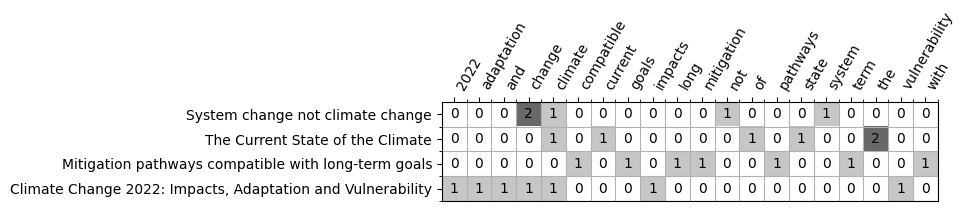

In [5]:
fig, ax = plt.subplots()

X = dfm.todense()

# Plot a heatmap of the dfm
ax.imshow(
    X,
    cmap = "Greys",
    norm = Normalize(vmin=0, vmax=3)
)

# Create a grid using minor ticks
ax.set_xticks(np.arange(X.shape[1])+0.5, minor=True)
ax.set_yticks(np.arange(X.shape[0])+0.5, minor=True)
ax.grid(which="minor", zorder=5)

# Set up x labels
ax.xaxis.tick_top()
ax.set_xticks(np.arange(X.shape[1]))
ax.set_xticklabels(vocab, rotation=60, ha="left", va="bottom")

# Set up y labels
ax.set_yticks(range(len(texts)))
ax.set_yticklabels(texts)

# Put the numbers in
for m in range(X.shape[0]):
    for n in range(X.shape[1]):
        ax.text(n, m, X[m, n], ha="center", va="center")

plt.savefig("plots/doc_feature_matrix.pdf", bbox_inches="tight")

In [6]:
dfm.shape[1]

20

In [9]:
texts = [
  "Limited offer, free Apple IPad",
  "Limited offer, free apple",
  "Limit your speed on the freeway",
  "Limit your speed on the free way",
  "Ipaddington is not in the free market"
]

vectorizer = TfidfVectorizer(use_idf=False)
dfm = vectorizer.fit_transform(texts)
vocab = vectorizer.get_feature_names_out()
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)
X = dfm.toarray()
vi = vectorizer.vocabulary_
pred = -1 + X[:,vi["limited"]]*0.5 + X[:,vi["free"]]*3 + X[:,vi["ipad"]]*3

pred


array([ 1.90688837,  0.75      , -1.        ,  0.13389342,  0.13389342])

In [19]:
vi

{'limited': 8,
 'offer': 11,
 'free': 1,
 'apple': 0,
 'ipad': 4,
 'limit': 7,
 'your': 16,
 'speed': 13,
 'on': 12,
 'the': 14,
 'freeway': 2,
 'way': 15,
 'ipaddington': 5,
 'is': 6,
 'not': 10,
 'in': 3,
 'market': 9}

In [6]:
texts = ["System change not climate change","The Current State of the Climate"]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)
X

<2x8 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [9]:
counts = X.sum(axis=0).A1
order = np.argsort(counts)[::-1]
print(vectorizer.get_feature_names_out()[order])
print(counts[order])


['the' 'climate' 'change' 'system' 'state' 'of' 'not' 'current']
[2 2 2 1 1 1 1 1]
